# Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df_rwanda = pd.read_csv('./data/rwanda')

X = df_rwanda['mean_light']
y = df_rwanda['wealth_index']

X = np.resize(X, (X.shape[0], 1))
y = np.resize(y, (y.shape[0], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Utils

In [3]:
def plot_regression(estimator, X_train, y_train):
    x_axis = np.linspace(0, 64, 1000).reshape((1000, 1))
    y_axis = estimator.predict(x_axis)
    plt.figure(figsize=(20, 10))
    plt.grid()
    plt.xlim(-1, 64)
    plt.ylim(-2, 5)
    plt.title('Wealth prediction according to nightlight intensity')
    plt.xlabel('nightlight intensity')
    plt.ylabel('wealth')
    plt.scatter(X_train, y_train)
    plt.plot(x_axis, y_axis)
    plt.show()

# Parametric Regression

## Linear Regression

It is assumed that $y_i = x_i^T \beta_* + \epsilon_i$ for i = 1, ... n where $\epsilon_i$ are iid random variables in $\mathbb{R}^d$, $x_i \in \mathbb{R}^d$ and $y_i \in \mathbb{R}$. $\beta_*$ is an unknown vector $\mathbb{R}^d$ we want to estimate with a least-squares estimator.  
The model is written : $$Y = X \beta _* + \epsilon$$ where $E(\epsilon) = 0$ and $E(\epsilon \epsilon^{'}) = \sigma^2_* Id$ and the matrix X has full rank.  
The least squares estimator of $\beta_*$ is defined as a solution to : $$\hat{\beta} = argmin_{\beta \in \mathbb{R}^d} || Y - X \beta || ^2 _2$$  
The analytical solution is the following estimator : $$\hat{\beta} = (X^T X)^{-1} X^T Y$$  
This estimator is unbiased and satisfies $V(\hat{\beta}) = \sigma_*^2 (X^T X)^{-1}$.

> **Proof**  
$|| Y - X \beta || ^2 _2 = (Y - X \beta)^T (Y - X \beta) = Y^TY - 2Y^TX\beta + \beta^TX^TX\beta$  
$\frac{\partial{|| Y - X \beta || ^2 _2}}{\partial{\beta}} (\beta) = - 2X^TY + 2X^TX\hat{\beta}$  
$\frac{\partial{|| Y - X \beta || ^2 _2}}{\partial{\beta}} (\hat{\beta})= 0 \implies X^TX\hat{\beta} = X^TY$ (Normal equation)  
Because X has full rank, the solution is : $$\hat{\beta} = (X^T X)^{-1} X^T Y$$  
This estimator is unbiased : $$E(\hat{\beta}) = E((X^T X)^{-1} X^T Y) = (X^T X)^{-1} X^T E(Y) = (X^T X)^{-1} X^T (E(X\beta_*) + E(\epsilon)) = (X^T X)^{-1} (X^T X) \beta_* = \beta_*$$  
and satisfies : $$V(\hat{\beta}) = V((X^T X)^{-1} X^T Y) = (X^T X)^{-1} X^T V(Y) ((X^T X)^{-1} X^T)^T = (X^T X)^{-1} X^T V(Y) X (X^TX)^{-1} = \sigma_*^2 (X^T X)^{-1} (X^T X) (X^T X)^{-1} = \sigma_*^2 (X^T X)^{-1}$$

**Probabilistic interpretation :**  
When $\epsilon_i \sim N(0, \sigma^2)$, the least squares estimator can be derived from the maximum likelihood estimator. Indeed, it implies that $(y_i|x_i; \beta) \sim N(x_i^T \beta, \sigma ^2)$.  
The likelihood is defined as $L(\beta) = P(Y|X; \beta) = \prod_{i = 1}^n P(y_i|x_i; \beta) = \prod_{i = 1}^n \frac {1}{\sqrt{2\pi} \sigma} \exp(-\frac{(y_i - x_i^T \beta)^2}{2\sigma^2})$.  
Instead of maximizing the likelihood, we can instead maximize any strictly increasing function of $L(\beta)$, such as the log-likelihood : $$l(\beta) = \log(L(\beta)) = \sum_{i=1}^n \frac {1}{\sqrt{2\pi} \sigma} \exp(-\frac{(y_i - x_i^T \beta)^2}{2\sigma^2}) = -n\log(\sqrt{2\pi} \sigma) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - x_i^T \beta)^2$$  
Thus, maximizing $l(\beta)$ is equivalent to minimizing $$||Y - X\beta||^2_2 = \sum_{i=1}^n (y_i - x_i^T \beta)^2$$

**LMS (Least Mean Squares) Algorithm :**  
We can then consider this problem as the minimization of the following cost function : $$J(\beta) = ||Y - X\beta||^2_2$$  
To obtain the minimum, let's consider the gradient descent algorithm : $$\beta_{t+1} = \beta_t - \alpha \frac{\partial{J}}{\partial\beta}(\beta_t)$$  
This gives the update rule : $$\beta_{t+1} = \beta_t - \alpha ...$$  

> **Proof**
$\frac{\partial{J}}{\partial\beta}(\beta_t) = ...$

In [14]:
class LinearRegression:
    
    def __init__(self):
        self.coeff = None
        
    def train(self, X_train, y_train):
        intercept = np.ones((X_train.shape[0], 1))
        X = np.append(intercept, X_train, axis=1)
        beta = scipy.linalg.solve(np.dot(X.T, X), np.dot(X.T, y_train))
        self.coeff = beta
        print("MSE =", np.linalg.norm(y_train - np.dot(X, self.coeff)))
    
    def predict(self, X_test):
        intercept = np.ones((X_test.shape[0], 1))
        X = np.append(intercept, X_test, axis=1)
        y_test = np.dot(X, self.coeff)
        return y_test

MSE = 8.469370903109246
Coefficients : [[-0.33056575]
 [ 0.06853734]]
Prediction : [[0.11150012]]


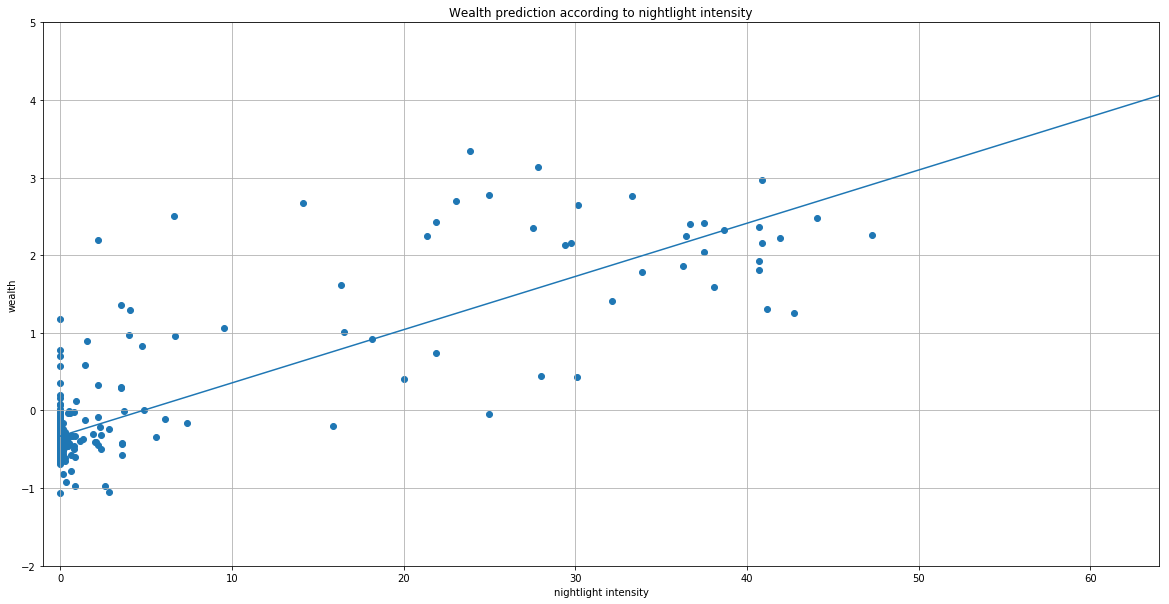

In [16]:
estimator = LinearRegression()
estimator.train(X_train, y_train)

print("Coefficients :", estimator.coeff)
print("Prediction :", estimator.predict(np.array([X_test[11]])))

plot_regression(estimator, X_train, y_train)

## Ridge Regression

Model : $$Y = X \beta_* + \epsilon$$  
Regularized least squares estimator : $$\beta_n = argmin_{\beta \in \mathbb{R}^d} || Y - X \beta || ^2 _2 + \gamma || \beta || ^2 _2$$
Analytical solution : $$\beta_n = (X^T X + \gamma Id)^{-1} X^T Y$$  

- an example of regularized linear regression
- $(X^TX + \gamma I_n)$ is always nonsingular
- common approach to control estimator variance
- can be derive from MAP estimator
- but the estimator is now biased

In [17]:
class RidgeRegression:
    
    def __init__(self, gamma):
        self.coeff = None
        self.gamma = gamma
        
    def train(self, X_train, y_train):        
        intercept = np.ones((X_train.shape[0], 1))
        X = np.append(intercept, X_train, axis=1)
        beta = scipy.linalg.solve(np.dot(X.T, X) + self.gamma * np.identity(X.shape[1]), np.dot(X.T, y_train))
        #beta = np.dot(X.T, np.linalg.inv(np.dot(X, X.T) + gamma * np.identity(X.shape[0])).dot(y_train))
        self.coeff = beta
        print("MSE =", np.linalg.norm(y_train - np.dot(X, self.coeff)))
    
    def predict(self, X_test):
        intercept = np.ones((X_test.shape[0], 1))
        X = np.append(intercept, X_test, axis=1)
        y_test = np.dot(X, self.coeff)
        return y_test

MSE = 12.28873220039012
Coefficients : [[-0.00142539]
 [ 0.02666342]]
Prediction : [[0.17055369]]


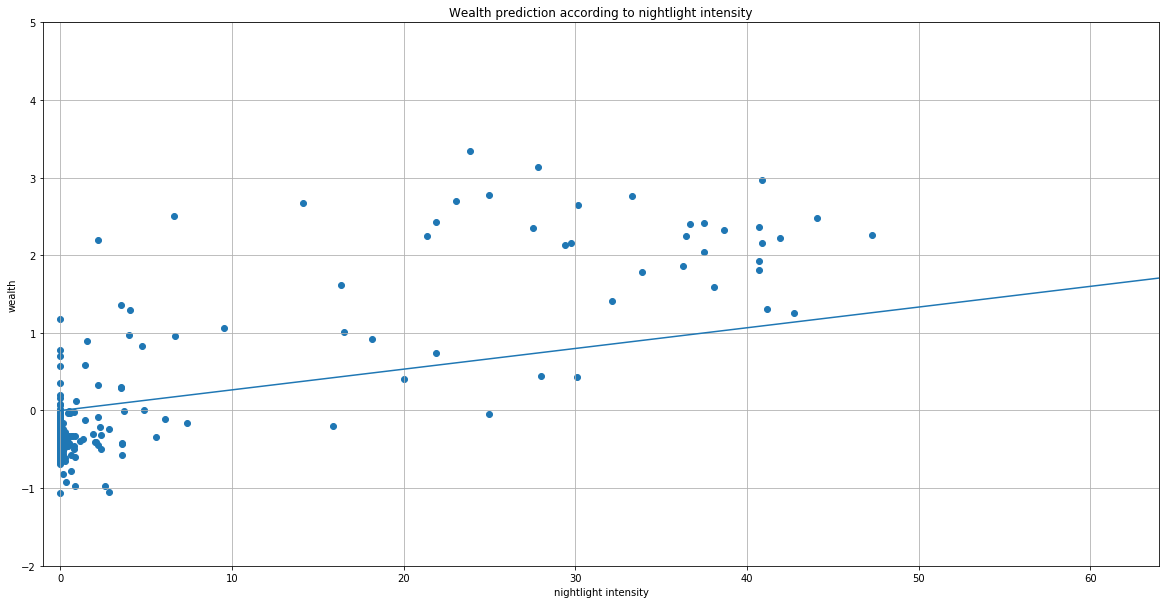

In [19]:
estimator = RidgeRegression(gamma=5e4)
estimator.train(X_train, y_train)

print("Coefficients :", estimator.coeff)
print("Prediction :", estimator.predict(np.array([X_test[11]])))

plot_regression(estimator, X_train, y_train)

## Lasso Regression

Model : $$Y = X \beta_* + \epsilon$$  
Regularized least squares estimator : $$\beta_n = argmin || Y - X \beta || ^2 _2 + \gamma || \beta || _1$$  

- convex but not differentiable
- we can explicit the solution or use gradient descent or LP

## Bayesian Ridge Regression

- bayesian approach
- prior probability distribution on the weights
- posterior probability distribution from the data thanks to MAP estimator
- confidence interval on the weights

# Nonparametric Regression

Nonparametric regression is a natural extension of parametric regression. There are several approaches. Firstly, we can predict a value by looking at the known values in its neighboring (kNN, smoothing, local regression). Secondly, we can extend the least-squares estimator by minimizing it on a functional space (polynomial, RKHS).

## Smoothing, local linear regression

Model : $$\hat{y} = \sum_{i=1}^n \frac {w_i(x)}{\sum_{j=1}^n w_j(x)} y_i$$

### k-Nearest-Neighbors Regression

k-NN regression is based on a rough weighting : it takes into account only the k nearest points to the tested point and returns a mean of them.  
$$x_i \in N_k(x) \implies w_i(x) = 1$$
$$x_i \notin N_k(x) \implies w_i(x) = 0$$
where $N_k(x)$ is the set of the k nearest points to x.  
Thus : $$\hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i$$

In [261]:
class NearestNeighborsRegression:
    
    def __init__(self, k):
        self.k = k
        self.X = None
        self.y = None
    
    def distance(self, x, y):
        return np.linalg.norm(x - y)
        
    def train(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
    
    def predict(self, X_test):
        y_test = []
        for x_test in X_test:
            distance_matrix = [self.distance(x_test, self.X[i]) for i in range(self.X.shape[0])]
            idx = np.argsort(distance_matrix)[:self.k]
            res = np.mean(y_train[idx])
            y_test.append(res)
        y_test = np.array(y_test)
        return y_test

Prediction : [0.570689]


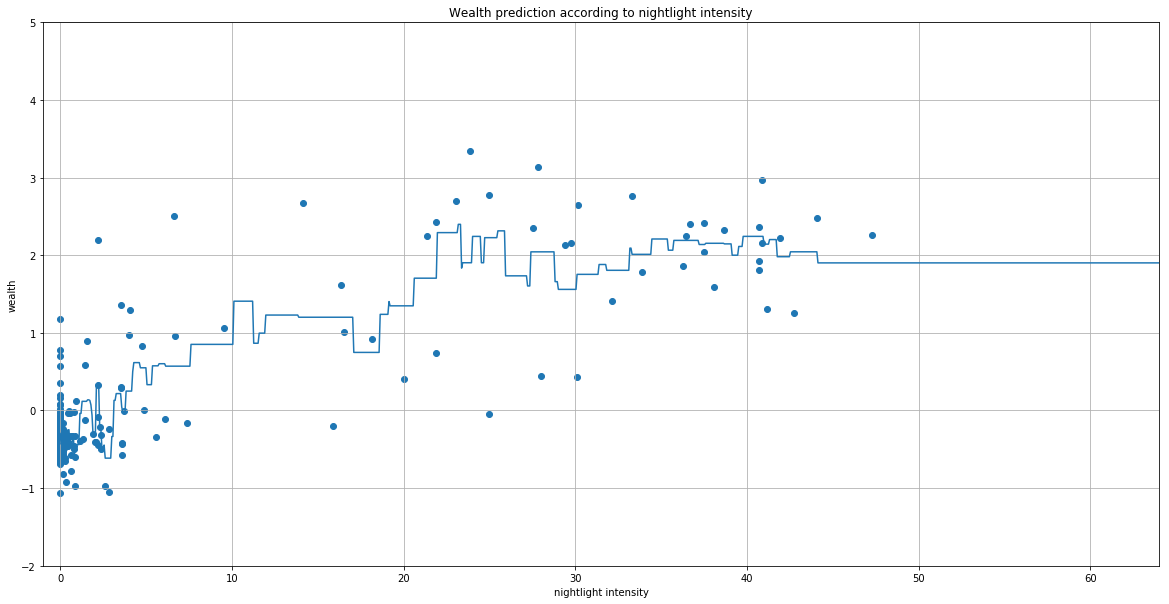

In [275]:
estimator = NearestNeighborsRegression(k=5)
estimator.train(X_train, y_train)

print("Prediction :", estimator.predict(np.array([X_test[11]])))

plot_regression(estimator, X_train, y_train)

### Kernel Smoothing

This is a smoother approach than precedently. Weights are, again, calculated based on the distance to the test point but all training points are took into account for the prediction. Weights decrease to zero with the distance, this decreasing is determined by the chosen kernel.  
$$w_i(x) = k(x_i, x)$$

In [60]:
class KernelSmoothing:
    
    def __init__(self, bandwidth):
        self.bandwidth = bandwidth
        self.X = None
        self.y = None
        
    def kernel(self, x, y):
        return (1 / np.sqrt(2*np.pi)) * np.exp(- 0.5 * np.linalg.norm(x - y)**2 / self.bandwidth**2)
    
    def train(self, X_train, y_train):
        self.X = X_train
        self.y = y_train
        
    def predict(self, X_test):
        y_test = []
        for x_test in X_test:
            W = [self.kernel(x_test, self.X[i]) for i in range(self.X.shape[0])]
            res = np.dot(W, self.y) / np.sum(W)
            y_test.append(res)
        y_test = np.array(y_test)
        return y_test

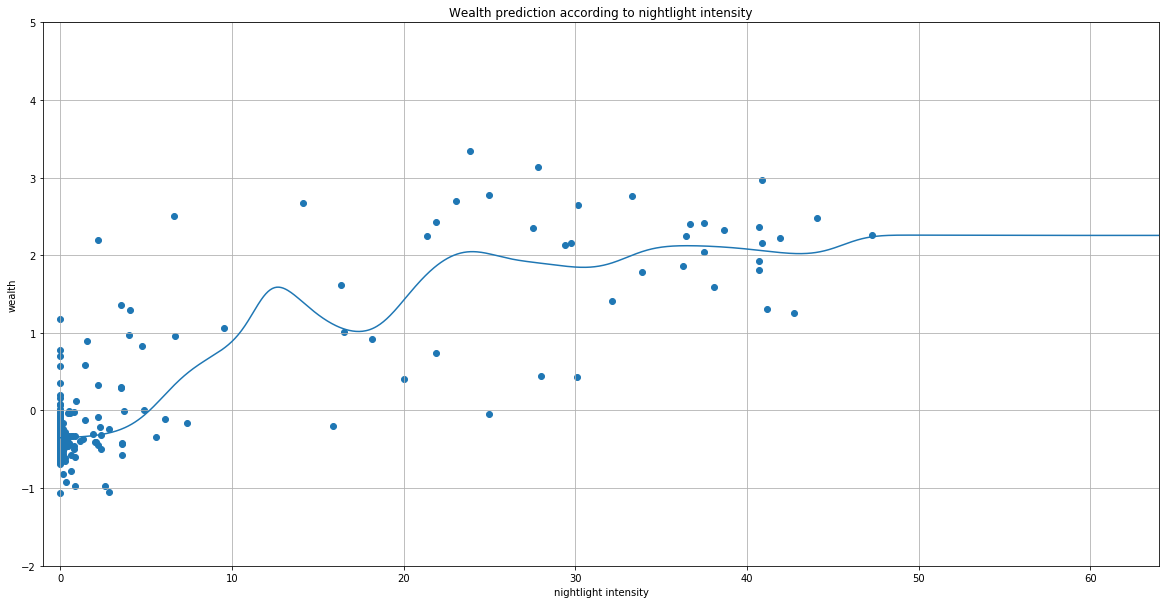

In [61]:
estimator = KernelSmoothing(2.)
estimator.train(X_train, y_train)

plot_regression(estimator, X_train, y_train)

### Local Linear Regression

We can show that the precedent model is equivalent to the following procedure :  
1. Fit $\beta$ to minimize $\sum_{i=1}^n w_i(x) (y_i - \beta)^2$  
2. Output $\beta$  

Instead, we could consider forming a local linear estimator : that's local linear regression.  
1. Fit $\beta$ to minimize $\sum_{i=1}^n w_i(x) (y_i - x^T \beta)^2$  
2. Output $x^T \beta$  

The minimization problem is written, in matrix form : $$\hat{\beta} = (Y - X\beta)^T W(x_0) (Y - X\beta)$$  
This is very similar to the least squares problem, the solution is then : $$\hat{\beta} = (X^T W(x_0) X)^{-1}X^T W(x_0) ^TY$$ and $$y = x_0^T (X^T W(x_0) X)^{-1}X^T W(x_0) ^TY$$

In [55]:
class LocallyWeightedLinearRegression:
    
    def __init__(self, bandwidth):
        self.bandwidth = bandwidth
        self.X = None
        self.y = None
    
    def kernel(self, x, y):
        return np.exp(- 0.5 * np.linalg.norm(x - y)**2 / self.bandwidth**2)
        
    def train(self, X_train, y_train):
        intercept = np.ones((X_train.shape[0], 1))
        self.X = np.append(intercept, X_train, axis=1)
        self.y = y_train
    
    def predict(self, X_test):
        Y_test = []
        for x_test in X_test:
            x_test = np.resize(x_test, (1, 1))
            W = [self.kernel(x_test[0], X_train[i]) for i in range(X_train.shape[0])]
            W = np.diag(W)
            beta = scipy.linalg.solve(np.dot(self.X.T, W).dot(self.X), np.dot(self.X.T, W).dot(self.y))
            intercept = np.ones((x_test.shape[0], 1))
            x_test = np.append(intercept, x_test, axis=1)
            y_test = np.dot(x_test, beta)
            Y_test.append(y_test)
        Y_test = np.array(Y_test)
        Y_test = np.resize(Y_test, (Y_test.shape[0], 1))
        return Y_test

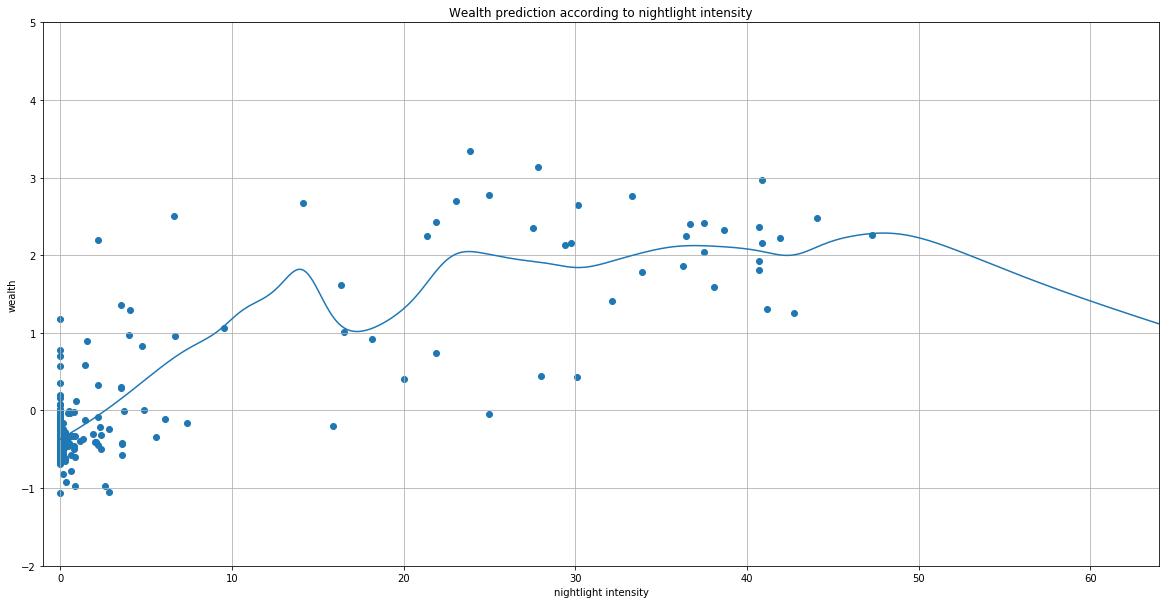

In [56]:
estimator = LocallyWeightedLinearRegression(bandwidth=2.)
estimator.train(X_train, y_train)

plot_regression(estimator, X_train, y_train)

### Local Polynomial Regression

## Projection on a functional basis, kernel regression

### Polynomial basis

In [12]:
class PolynomialRegression:
    
    def __init__(self, p):
        self.coeff = None
        self.p = p
    
    def phi(self, x, j):
        return x**j
        
    def train(self, X_train, y_train):
        n = X_train.shape[0]
        psi = [[self.phi(X_train[i], j) for j in range(self.p)] for i in range(n)]
        psi = np.resize(psi, (np.shape(psi)[0], np.shape(psi)[1]))
        
        alpha = scipy.linalg.solve(np.dot(psi.T, psi), np.dot(psi.T, y_train))
        self.coeff = alpha
        
        print("MSE =", np.linalg.norm(y_train - np.dot(psi, self.coeff)))
    
    def predict(self, X_test):
        m = X_test.shape[0]
        psi_test = [[self.phi(X_test[i], j) for j in range(self.p)] for i in range(m)]
        psi_test = np.resize(psi_test, (np.shape(psi_test)[0], np.shape(psi_test)[1]))
        y_test = np.dot(psi_test, self.coeff)
        return y_test

MSE = 7.887238509691519
Coefficients : [[-3.71757478e-01]
 [ 1.68839937e-01]
 [-6.16990719e-03]
 [ 2.13146833e-04]
 [-4.94065757e-06]
 [ 4.45982314e-08]]
Prediction : [[0.50971829]]


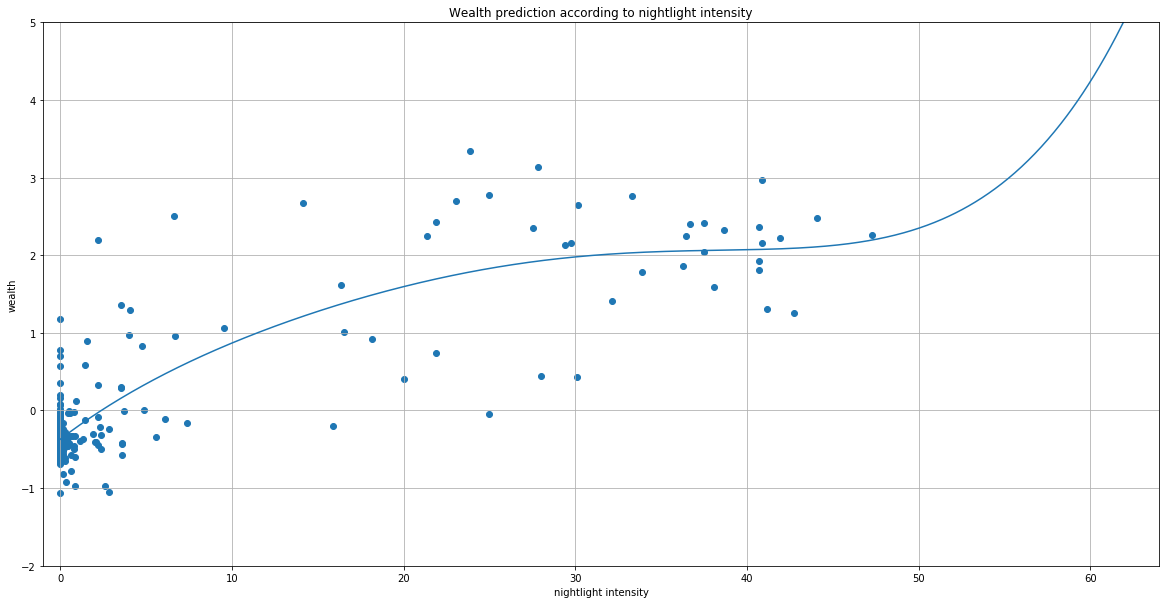

In [25]:
estimator = PolynomialRegression(p=6)
estimator.train(X_train, y_train)

print("Coefficients :", estimator.coeff)
print("Prediction :", estimator.predict(np.array([X_test[11]])))

plot_regression(estimator, X_train, y_train)

### Splines basis

### Kernel Ridge Regresion

In [82]:
class KernelRidgeRegression:
    
    def __init__(self, bandwidth, gamma):
        self.coeff = None
        self.bandwidth = bandwidth
        self.gamma = gamma
    
    def kernel(self, x, y):
        return np.exp(- 0.5 * np.linalg.norm(x - y)**2 / self.bandwidth**2)
        
    def train(self, X_train, y_train):
        K = np.array([[self.kernel(X_train[i], X_train[j]) for j in range(X_train.shape[0])] 
                     for i in range(X_train.shape[0])])
        self.coeff = scipy.linalg.solve(np.dot(K.T, K) + self.gamma * np.identity(K.shape[0]), np.dot(K.T, y_train))
    
    def predict(self, X_test):
        K = np.array([[self.kernel(X_test[i], X_train[j]) for j in range(X_train.shape[0])] 
                     for i in range(X_test.shape[0])])
        y_test = np.dot(K, self.coeff)
        return y_test

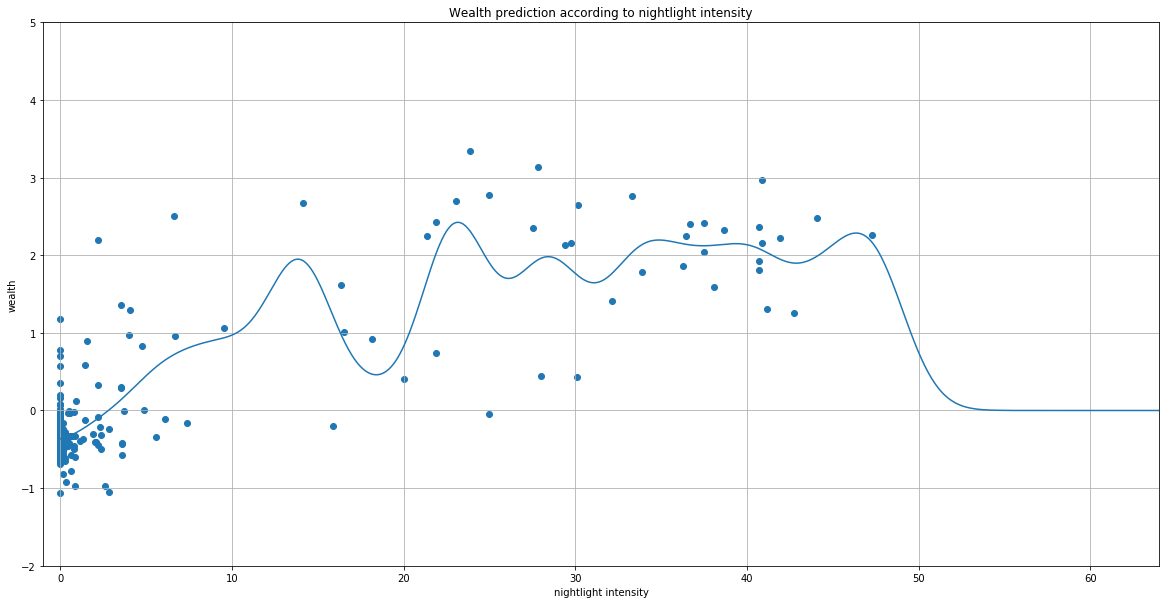

In [83]:
estimator = KernelRidgeRegression(bandwidth=2., gamma=0.1)
estimator.train(X_train, y_train)

plot_regression(estimator, X_train, y_train)

## Locally Adaptive Regression

### Wavelets Regression

## SVR

# Model selection

# Bibliographie

Nonparametric Regression theory : http://www.stat.cmu.edu/~larry/=sml/nonpar.pdf  